<a href="https://colab.research.google.com/github/krishagajjar025/krishaAwt/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the boston house price dataset

In [ ]:
from google.colab import files
uploaded= files.upload()
house_price_dataset=pd.read_csv('house price dataset.csv')
print(house_price_dataset)

Saving house price dataset.csv to house price dataset (1).csv
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1       

In [ ]:
#loading the dataset to a pandas dataframe
house_price_dataset=pd.DataFrame(house_price_dataset)
import pandas as pd
house_price_dataset=pd.read_csv('house price dataset.csv')


In [ ]:
#print first 5 rows of our dataframe
house_price_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#add the target(price) column to the dataframe
import pandas as pd

# Example: Creating a sample dataframe
data = {
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6],
    # Add more columns if needed
}
house_price_dataframe = pd.DataFrame(data)
print(house_price_dataframe)

house_price_dataframe = pd.read_csv('house price dataset.csv')  # Replace 'your_file.csv' with the actual file path
print(house_price_dataframe.head())



   feature1  feature2
0         1         4
1         2         5
2         3         6
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
#checking the number of rows and columns in the data frame
house_price_dataframe.shape

(545, 13)

In [ ]:
#check for missing values
house_price_dataframe.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
#statistical measures of the dataset
house_price_dataframe.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


undersanding the correlation between various features in the dataset

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

house_price_dataframe = pd.read_csv('house price dataset.csv')
house_price_dataframe.dtypes
numeric_data = house_price_dataframe.select_dtypes(include=['number'])
house_price_dataframe['price'] = house_price_dataframe['price'].map({'yes': 1, 'no': 0})
correlation = numeric_data.corr()
print(correlation)

Saving house price dataset.csv to house price dataset (1).csv
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


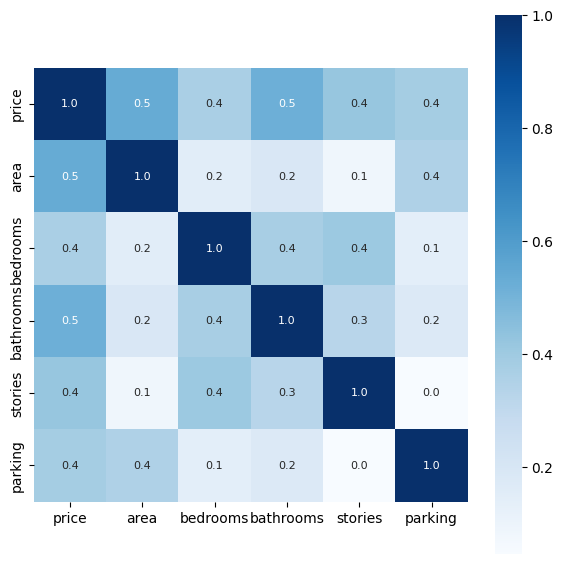

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for correlations
plt.figure(figsize=(7, 7))
house_price_dataframe['price'] = house_price_dataframe['price'].map({'yes': 1, 'no': 0})
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

splitting the data and target

In [ ]:
x= house_price_dataframe.drop(['price'],axis=1)
y= house_price_dataframe['price']
print(x)
print(y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

Model training

In [ ]:
#loading the model
from xgboost import XGBRegressor
model = XGBRegressor()

Splitting the data into training data and test data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
house_price_dataset = pd.read_csv('house price dataset.csv')

X = house_price_dataset.drop('price')
Y = house_price_dataset['price']
house_price_dataset=pd.read_csv('house price dataset.csv')
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state=1)
model = XGBRegressor()
print(X.shape, X_train.shape, X_test.shape)